In [ ]:
Tóm tắt:
    - Các giả thuyết đặt ra cho mô hình hồi quy tuyến tính:
        + Giả thuyết thứ 1: các căn nhà càng có nhiều phòng thì giá bán càng cao hơn ('Rooms')
        + Giả thuyết thứ 2: các căn nhà type 'h' có giá bán tốt hơn type 't' và type 'u' là thấp nhất ('Type')
        + Giả thuyết thứ 3: các căn nhà càng gần trung tâm có giá bán TB càng cao ('Distance')
        + Giả thuyết thứ 4: các căn nhà có nhiều chỗ đỗ xe có giá bán TB cao hơn ('Car')
        + Giả thuyết thứ 5: nhà có diện tích đất càng lớn thì giá bán TB càng cao ('Landsize')
        + Giả thuyết thứ 6: nhà có diện tích sử dụng càng lớn thì giá bán TB càng cao ('BuildingArea')
        + Giả thuyết thứ 7: thời gian sử dụng căn nhà càng lâu giá bán TB càng giảm ('YearUsed')
        + Giả thuyết thứ 8: các căn nhà sử dụng từ 60 năm trở lên được bán với giá cao hơn ('Heritage')
        + Giả thuyết thứ 9: giá bán nhà TB có sự khác nhau giữa các khu vực ('Regionname')

In [127]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import statsmodels.api as sm
pd.set_option('float_format', '{:,.2f}'.format)
pd.set_option('max_columns', None)

In [165]:
data = pd.read_csv(r'D:\Machine Learning 3\Melbourne_housing_FULL.csv')

In [3]:
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,nan,SS,Jellis,3/09/2016,2.50,"3,067.00",2.00,1.00,1.00,126.00,nan,nan,Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"
1,Abbotsford,85 Turner St,2,h,"1,480,000.00",S,Biggin,3/12/2016,2.50,"3,067.00",2.00,1.00,1.00,202.00,nan,nan,Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"
2,Abbotsford,25 Bloomburg St,2,h,"1,035,000.00",S,Biggin,4/02/2016,2.50,"3,067.00",2.00,1.00,0.00,156.00,79.00,"1,900.00",Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00"
3,Abbotsford,18/659 Victoria St,3,u,nan,VB,Rounds,4/02/2016,2.50,"3,067.00",3.00,2.00,1.00,0.00,nan,nan,Yarra City Council,-37.81,145.01,Northern Metropolitan,"4,019.00"
4,Abbotsford,5 Charles St,3,h,"1,465,000.00",SP,Biggin,4/03/2017,2.50,"3,067.00",3.00,2.00,0.00,134.00,150.00,"1,900.00",Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00"
5,Abbotsford,40 Federation La,3,h,"850,000.00",PI,Biggin,4/03/2017,2.50,"3,067.00",3.00,2.00,1.00,94.00,nan,nan,Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"
6,Abbotsford,55a Park St,4,h,"1,600,000.00",VB,Nelson,4/06/2016,2.50,"3,067.00",3.00,1.00,2.00,120.00,142.00,"2,014.00",Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00"
7,Abbotsford,16 Maugie St,4,h,nan,SN,Nelson,6/08/2016,2.50,"3,067.00",3.00,2.00,2.00,400.00,220.00,"2,006.00",Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"
8,Abbotsford,53 Turner St,2,h,nan,S,Biggin,6/08/2016,2.50,"3,067.00",4.00,1.00,2.00,201.00,nan,"1,900.00",Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"
9,Abbotsford,99 Turner St,2,h,nan,S,Collins,6/08/2016,2.50,"3,067.00",3.00,2.00,1.00,202.00,nan,"1,900.00",Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"


In [4]:
data.shape

(34857, 21)

In [ ]:
Dữ liệu có 34857 dòng và 21 cột

In [5]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
Biến 'Price' có 7610 missing value, chiếm ~22% tổng số quan sát. Các quan sát missing value ở biến 'Price' nếu phân theo biến
'Method' thuộc một trong hai trường hợp sau:
- Các căn nhà bán đấu giá không thể khớp giá trong phiên đấu giá (PI, VB) hoặc chủ nhà rút khỏi đấu giá (W)
- Các căn nhà được bán không thông qua đấu giá (SP, SN, PN, SS, SA) và qua đấu giá nhưng không có dữ liệu (S)

Đối với trường hợp thứ nhất có 2192 quan sát và trường hợp thứ hai có 5418 quan sát. Đối với các missing value thuộc trường hợp
thứ nhất chúng ta sẽ loại bỏ các quan sát này do các giao dịch này chưa được hoàn thành. Đối với các missing value thuộc trường
hợp thứ hai chúng ta sẽ thay thế missing value bằng giá bán trung bình của 'Regionname' của căn nhà đó.
Eg: một căn nhà có 'Price' là missing value thuộc 'Regionname' Southern Metropolitan sẽ được replace bằng 1,395,928.33

In [166]:
# Giá bán trung bình theo 'Regionname'
avg_by_region = data.groupby('Regionname').Price.mean().sort_values(ascending=False)
avg_by_region

Regionname
Southern Metropolitan        1,395,928.33
Eastern Metropolitan         1,108,723.00
South-Eastern Metropolitan     877,682.68
Northern Metropolitan          861,484.05
Western Metropolitan           837,615.32
Eastern Victoria               714,328.20
Northern Victoria              619,051.20
Western Victoria               432,606.77
Name: Price, dtype: float64

In [167]:
# loại các quan sát có 'Price' = N/A và Method thuộc ['PI', 'VB', 'W']
data_2 = data[~((data.Price.isnull() == True) & (data.Method.isin(['PI', 'VB', 'W'])))]

In [168]:
# replace các missing value của 'Price' còn lại bằng mean theo 'Regionname'
for region in avg_by_region.index:
    data_2.loc[(data_2.Price.isnull() == True) & (data_2.Regionname == region), 'Price'] = avg_by_region[region]

C:\Users\PC\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
data_2.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          7591
Bathroom          7600
Car               8066
Landsize         10920
BuildingArea     19757
YearBuilt        18035
CouncilArea          3
Lattitude         7368
Longtitude        7368
Regionname           3
Propertycount        3
dtype: int64

In [169]:
# drop missing value ở các cột ['Distance', 'Postcode', 'CouncilArea', 'Regionname', 'Propertycount']
data_2 = data_2.dropna(subset = ['Distance', 'Postcode', 'CouncilArea', 'Regionname', 'Propertycount'])

In [170]:
# drop các column ['Lattitude', 'Longtitude','Propertycount']
data_2 = data_2.drop(columns = ['Lattitude', 'Longtitude','Propertycount', 'Postcode'])

In [13]:
data_2.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            1
Bedroom2         7591
Bathroom         7600
Car              8066
Landsize        10920
BuildingArea    19757
YearBuilt       18035
CouncilArea         3
Regionname          3
dtype: int64

In [ ]:
Các missing value ở các biến còn lại rất nhiều, có hai hướng xử lý:
- Drop N/A tất cả, chỉ giữ lại những dữ liệu tốt nhất (data_3)
- Phương án thử hai là thay các missing value bằng giá trị trung bình (data_2):
    + Bedroom2: ta thấy tương quan giữa 'Bedroom2' và 'Rooms' rất cao (0,96) do đó ta có thể bỏ biến 'Bedroom2'
    + Bathroom: tương tự như trên, ta có thể bỏ biến 'Bathroom'
    + Car: thay thế bằng giá trị trung bình chia theo 'Type'. Các căn nhà thuộc dạng cao cấp (h) sẽ có số chỗ đỗ xe nhiều hơn
            các căn nhà phố (t) hay nhà chung cư (u)
    + Landsize: thay thế bằng giá trị trung bình chia theo 'Type'
    + BuildingArea: thay thế bằng giá trị trung bình chia theo 'Type'
    + YearBuilt: chia theo thời gian xây TB chia theo 'Regionname' và 'Type'

In [9]:
# Ma trận hệ số tương quan giữa các biến
data_2.corr()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
Rooms,1.00,0.42,0.26,0.96,0.61,0.39,0.04,0.15,-0.01
Price,0.42,1.00,-0.21,0.39,0.39,0.18,0.03,0.10,-0.31
Distance,0.26,-0.21,1.00,0.27,0.12,0.24,0.06,0.08,0.33
Bedroom2,0.96,0.39,0.27,1.00,0.61,0.39,0.04,0.15,-0.00
Bathroom,0.61,0.39,0.12,0.61,1.00,0.31,0.04,0.14,0.17
Car,0.39,0.18,0.24,0.39,0.31,1.00,0.03,0.10,0.13
Landsize,0.04,0.03,0.06,0.04,0.04,0.03,1.00,0.37,0.04
BuildingArea,0.15,0.10,0.08,0.15,0.14,0.10,0.37,1.00,0.06
YearBuilt,-0.01,-0.31,0.33,-0.00,0.17,0.13,0.04,0.06,1.00


In [ ]:
- 'Price' có tương quan khá cao với 'Rooms', 'Distance', 'Bedroom2', 'Bathroom' và 'YearBuilt'
- 'Rooms' có tương quan rất cao với 'Bedroom2' và 'Bathroom' cũng như với 'Car' cho thấy có khả năng cao có đa cộng tuyến giữa
các biến này. Một căn nhà có nhiều phòng ngủ và phòng tắm thì tất nhiên sẽ có nhiều phòng nói chung.

In [171]:
# 'Car' trung bình theo 'Type'
avg_car = data_2.groupby('Type').Car.mean()
avg_car

Type
h   1.86
t   1.60
u   1.14
Name: Car, dtype: float64

In [172]:
# 'BuildingArea' trung bình theo 'Type'
avg_BA = data_2.groupby('Type').BuildingArea.mean()
avg_BA

Type
h   177.50
t   148.08
u    82.16
Name: BuildingArea, dtype: float64

In [173]:
# 'Landsize' trung bình theo 'Type'
avg_LS = data_2.groupby('Type').Landsize.mean()
avg_LS

Type
h   633.87
t   298.53
u   457.85
Name: Landsize, dtype: float64

In [174]:
# 'YearBuilt' trung bình theo 'Type' và 'Regionname'
avg_YB = data_2.groupby(['Regionname', 'Type']).YearBuilt.mean().round(0)
avg_YB

Regionname                  Type
Eastern Metropolitan        h      1,969.00
                            t      1,999.00
                            u      1,983.00
Eastern Victoria            h      1,986.00
                            t      2,011.00
                            u      2,007.00
Northern Metropolitan       h      1,953.00
                            t      1,999.00
                            u      1,985.00
Northern Victoria           h      1,994.00
                            t           nan
                            u      2,013.00
South-Eastern Metropolitan  h      1,976.00
                            t      2,001.00
                            u      1,981.00
Southern Metropolitan       h      1,944.00
                            t      1,996.00
                            u      1,975.00
Western Metropolitan        h      1,965.00
                            t      2,004.00
                            u      1,986.00
Western Victoria            h      1,978.00

In [175]:
# tạo tập data_3 là tập bỏ các missing values mà không ước lượng
data_3 = data_2.dropna()

In [176]:
# loại biến 'Bedroom2' và 'Bathroom' ở data_2
data_2 = data_2.drop(columns = ['Bedroom2', 'Bathroom'])

In [177]:
# replace missing values 'Car'
for house_type in avg_car.index:
    data_2.loc[(data_2.Car.isnull() == True) & (data_2.Type == house_type), 'Car'] = avg_car[house_type]

In [178]:
# replace missing values 'BuildingArea'
for house_type in avg_BA.index:
    data_2.loc[(data_2.BuildingArea.isnull() == True) & (data_2.Type == house_type), 'BuildingArea'] = avg_BA[house_type]

In [179]:
# replace missing values 'Landsize'
for house_type in avg_LS.index:
    data_2.loc[(data_2.Landsize.isnull() == True) & (data_2.Type == house_type), 'Landsize'] = avg_LS[house_type]

In [180]:
# replace missing values 'YearBuilt'
for region in avg_YB.index.levels[0]:
    for house_type in avg_YB[region].index:
        data_2.loc[(data_2.YearBuilt.isnull() == True) & (data_2.Type == house_type) & (data_2.Regionname == region), 'YearBuilt'] = avg_YB[region][house_type]

In [25]:
data_2.isnull().sum()

Suburb          0
Address         0
Rooms           0
Type            0
Price           0
Method          0
SellerG         0
Date            0
Distance        1
Car             0
Landsize        0
BuildingArea    0
YearBuilt       6
CouncilArea     3
Regionname      3
dtype: int64

In [181]:
# Vẫn còn 3 quan sát với YearBuilt là missing values, ta bỏ các quan sát này do không trọng yếu
data_2 = data_2.dropna()

In [182]:
# reindex dữ liệu
data_2.index = range(data_2.shape[0])

In [22]:
data_2.Price.describe()

count       32,659.00
mean     1,067,376.83
std        596,099.44
min         85,000.00
25%        676,000.00
50%        900,000.00
75%      1,395,928.33
max     11,200,000.00
Name: Price, dtype: float64

In [ ]:
- Giá bán bình quân là $1.067.377 với độ lệch chuẩn $596.099
- Trung vị khá gần với giá bán bình quân và đạt $900.000
- Phần lớn giá bán rớt vào khoảng từ $85.000 (min) đến $1.395.928 (Q3)
- Giá bán cao nhất là $11.200.000

In [30]:
data_2.groupby('Rooms').Price.describe().sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Rooms,,,,,,,,
16,1.00,"5,000,000.00",nan,"5,000,000.00","5,000,000.00","5,000,000.00","5,000,000.00","5,000,000.00"
12,3.00,"2,090,494.68","2,261,166.81","710,000.00","785,742.02","861,484.05","2,780,742.02","4,700,000.00"
10,6.00,"1,866,453.83","728,205.63","900,000.00","1,321,542.25","2,037,500.00","2,265,000.00","2,800,000.00"
6,181.00,"1,708,957.24","1,028,072.00","506,000.00","1,065,000.00","1,395,928.33","2,000,000.00","6,500,000.00"
5,"1,578.00","1,679,365.65","958,589.52","355,000.00","1,043,250.00","1,395,928.33","2,000,000.00","8,000,000.00"
7,26.00,"1,639,490.07","1,067,895.44","619,051.20","1,030,930.75","1,350,000.00","1,741,250.00","5,450,000.00"
8,17.00,"1,577,645.27","872,405.19","741,000.00","881,000.00","1,150,000.00","2,200,000.00","3,210,000.00"
9,3.00,"1,390,618.89","9,196.23","1,380,000.00","1,387,964.17","1,395,928.33","1,395,928.33","1,395,928.33"
4,"7,334.00","1,333,752.22","693,836.48","131,000.00","861,484.05","1,217,750.00","1,538,750.00","11,200,000.00"


In [ ]:
- Các căn nhà có nhiều phòng thường được bán với giá cao hơn.
- Tuy nhiên, có một ngoại lệ là các căn nhà có số lượng phòng từ 7 đến 9 lại có giá bán TB thấp.
- Điều này có thể do cỡ mẫu của các nhà loại này thấp nên TB không mang tính đại diện.
- Các căn nhà với số lượng phòng là 3 được giao dịch nhiều nhất với tổng số giao dịch là 14.271 căn.
- Các căn nhà có số phòng từ 7 trở lên rất ít được giao dịch với tổng số giao dịch ít hơn 30.

=> Giả thuyết thứ 1: các căn nhà càng có nhiều phòng thì giá bán càng cao hơn

In [31]:
data_2.groupby('Type').Price.describe().sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
h,"22,536.00","1,192,671.09","632,518.49","131,000.00","800,000.00","1,060,000.00","1,395,928.33","11,200,000.00"
t,"3,337.00","961,886.73","374,802.43","256,000.00","700,000.00","870,000.00","1,200,000.00","3,820,000.00"
u,"6,786.00","703,154.76","349,535.01","85,000.00","468,000.00","616,500.00","837,615.32","6,500,000.00"


In [ ]:
- Các căn nhà type 'h' (house, cottage, villa, semi, terrace) có giá bán TB $1.192.671 cao hơn type 't' (townhouse) và các căn
thuộc type 'u' (unit, duplex) có giá bán TB thấp nhất

=> Giả thuyết thứ 2: các căn nhà type 'h' có giá bán tốt hơn type 't' và type 'u' là thấp nhất

In [32]:
data_2.groupby('Method').Price.describe().sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Method,,,,,,,,
VB,"2,683.00","1,194,342.90","820,277.38","160,000.00","650,000.00","970,000.00","1,520,000.00","11,200,000.00"
PI,"3,255.00","1,117,883.99","711,985.85","85,000.00","650,000.00","920,000.00","1,400,000.00","9,000,000.00"
SN,"1,317.00","1,087,872.98","241,375.09","432,606.77","861,484.05","1,108,723.00","1,395,928.33","1,395,928.33"
PN,308.00,"1,086,158.27","265,168.94","432,606.77","861,484.05","1,108,723.00","1,395,928.33","1,395,928.33"
SS,36.00,"1,081,689.22","241,804.92","619,051.20","861,484.05","1,108,723.00","1,395,928.33","1,395,928.33"
S,"19,742.00","1,069,543.92","587,022.00","112,000.00","676,000.00","910,000.00","1,385,000.00","7,650,000.00"
SA,226.00,"1,024,556.23","515,922.35","240,000.00","652,000.00","900,000.00","1,348,750.00","3,750,000.00"
SP,"5,092.00","955,151.90","458,594.96","190,000.00","637,875.00","861,484.05","1,260,000.00","6,050,000.00"


In [ ]:
- Các phương pháp giao dịch nhà (thông qua đấu giá, thương lượng...) không ảnh hưởng nhiều đến giá trị căn nhà. Giá bán TB theo
các phương pháp giao dịch khá gần nhau.

In [183]:
# convert 'Date' từ str thành datetime
data_2.Date = pd.to_datetime(data_2.Date, format = '%d/%m/%Y')

In [34]:
data_2.groupby(data_2.Date.dt.year).Price.describe().sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
2016,"9,877.00","1,087,465.36","605,730.22","85,000.00","680,000.00","925,000.00","1,395,928.33","6,500,000.00"
2017,"18,492.00","1,064,199.40","596,120.61","121,000.00","680,000.00","900,000.00","1,360,000.00","11,200,000.00"
2018,"4,290.00","1,034,822.67","571,582.55","112,000.00","660,000.00","868,050.00","1,300,000.00","6,300,000.00"


In [ ]:
- Giá bán TB theo năm từ 2016 đến 2018 không có sự thay đổi lớn

In [35]:
data_2.groupby(data_2.Date.dt.month).Price.describe().sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
3,"2,844.00","1,117,116.29","624,912.98","210,000.00","700,000.00","950,000.00","1,395,928.33","6,300,000.00"
5,"3,244.00","1,114,532.22","619,498.07","145,000.00","700,000.00","970,000.00","1,395,928.33","8,000,000.00"
12,"1,797.00","1,106,859.58","652,345.35","270,000.00","678,000.00","930,000.00","1,395,928.33","6,600,000.00"
8,"2,759.00","1,096,902.71","612,720.82","185,000.00","679,000.00","932,000.00","1,395,928.33","6,500,000.00"
11,"4,078.00","1,084,758.15","615,097.76","220,000.00","680,000.00","910,000.00","1,395,928.33","7,000,000.00"
9,"3,901.00","1,077,570.66","583,341.79","85,000.00","685,000.00","920,000.00","1,395,928.33","6,800,000.00"
10,"3,642.00","1,073,144.56","626,452.39","237,000.00","688,125.00","905,000.00","1,365,000.00","11,200,000.00"
6,"2,959.00","1,073,121.85","587,600.58","145,000.00","700,000.00","900,000.00","1,395,928.33","7,650,000.00"
4,"1,460.00","1,042,278.61","538,867.88","160,000.00","682,750.00","910,750.00","1,375,000.00","5,800,000.00"


In [ ]:
- Giá bán TB qua các tháng từ năm 2016 đến năm 2018 không có sự thay đổi lớn

In [36]:
bins = pd.cut(data_2.Distance, bins = [-0.1, 10, 20, 30, 40, 50])
data_2.groupby(bins).Price.agg(['count','mean'])

,count,mean
Distance,,
"(-0.1, 10.0]",15922,"1,170,172.98"
"(10.0, 20.0]",13810,"1,019,245.53"
"(20.0, 30.0]",2173,"765,070.39"
"(30.0, 40.0]",649,"649,362.94"
"(40.0, 50.0]",105,"650,004.58"


In [ ]:
- Các căn nhà nằm trong khoảng 20km tính từ trung tâm thành phố có giá bán TB cao nhất.
- Càng ra xa trung tâm thành phố giá bán càng giảm dần.
- Phần lớn các nhà bán nằm trong khoảng 20km tính từ trung tâm.

=> Giả thuyết thứ 3: các căn nhà càng gần trung tâm có giá bán TB càng cao

In [37]:
bins_2 = pd.cut(data_2.Car, bins = [-0.1, 2, 4, 6, 8, 10, 30])
data_2.groupby(bins_2).Price.agg(['count','mean'])

,count,mean
Car,,
"(-0.1, 2.0]",29737,"1,043,332.20"
"(2.0, 4.0]",2603,"1,311,817.76"
"(4.0, 6.0]",265,"1,289,889.61"
"(6.0, 8.0]",42,"1,501,774.16"
"(8.0, 10.0]",7,"1,255,285.71"
"(10.0, 30.0]",5,"1,109,268.14"


In [ ]:
- Nhìn chung các căn nhà có nhiều chỗ đỗ xe có giá bán TB cao hơn, tuy nhiên tương quan này không nhất quán và có dấu hiệu đảo
chiều khi số lượng chỗ đỗ xe quá lớn.

=> Giả thuyết thứ 4: các căn nhà có nhiều chỗ đỗ xe có giá bán TB cao hơn

In [38]:
bins_3 = pd.cut(data_3.Landsize, bins = [-0.1, 150, 250, 350, 450, 550, 650, 750, 450000])
data_3.groupby(bins_3).Price.agg(['count','mean'])

,count,mean
Landsize,,
"(-0.1, 150.0]",1893,"789,436.93"
"(150.0, 250.0]",1225,"1,047,858.79"
"(250.0, 350.0]",1122,"1,103,656.46"
"(350.0, 450.0]",913,"1,146,712.69"
"(450.0, 550.0]",1038,"1,048,390.29"
"(550.0, 650.0]",1828,"1,134,417.13"
"(650.0, 750.0]",1398,"1,290,747.54"
"(750.0, 450000.0]",1425,"1,351,153.06"


In [ ]:
- Từ dữ liệu data_3 (dữ liệu drop N/A hoàn toàn, chỉ giữ lại dữ liệu đáng tin cậy), ta thấy nhìn chung nhà có diện tích đất càng
lớn thì giá bán TB càng cao.

=> Giả thuyết thứ 5: nhà có diện tích đất càng lớn thì giá bán TB càng cao

In [39]:
bins_4 = pd.cut(data_3.BuildingArea, bins = [-0.1, 50, 100, 150, 200, 250, 3200])
data_3.groupby(bins_4).Price.agg(['count','mean'])

,count,mean
BuildingArea,,
"(-0.1, 50.0]",366,"688,585.77"
"(50.0, 100.0]",2267,"752,159.59"
"(100.0, 150.0]",3840,"988,577.75"
"(150.0, 200.0]",2181,"1,205,723.62"
"(200.0, 250.0]",1064,"1,423,812.55"
"(250.0, 3200.0]",1124,"1,830,211.42"


In [ ]:
- Từ dữ liệu data_3 (dữ liệu drop N/A hoàn toàn, chỉ giữ lại dữ liệu đáng tin cậy), ta thấy nhìn chung nhà có diện tích sử dụng
càng lớn thì giá bán TB càng cao.

=> Giả thuyết thứ 6: nhà có diện tích sử dụng càng lớn thì giá bán TB càng cao

In [ ]:
Để đánh giá chất lượng còn lại của căn nhà đến khi bán, ta ước lượng bằng cách lấy năm bán (thể hiện ở biến 'Date') trừ đi năm
xây dựng (thể hiện ở biến 'YearBuilt') và gọi biến này là 'YearUsed'

In [184]:
# tính biến mới 'YearUsed' cho hai tập dữ liệu
data_2['YearUsed'] = data_2.Date.dt.year - data_2['YearBuilt']
data_3.Date = pd.to_datetime(data_3.Date, format = '%d/%m/%Y')
data_3['YearUsed'] = data_3.Date.dt.year - data_3['YearBuilt']

In [ ]:
Ta thấy có một số quan sát có biến 'YearUsed' < 0. Điều này có thể là do các căn nhà được bán trước khi xây dựng xong hoặc lỗi
nhập liệu. Ta sẽ cho 'YearUsed' của các quan sát này bằng 0.

In [185]:
data_2.loc[data_2.YearUsed<0,'YearUsed'] = 0
data_3.loc[data_3.YearUsed<0,'YearUsed'] = 0

In [42]:
bins_5 = pd.cut(data_2.YearUsed, bins = [-0.1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 850])
data_2.groupby(bins_5).Price.agg(['count','mean'])

,count,mean
YearUsed,,
"(-0.1, 10.0]",2259,"977,099.26"
"(10.0, 20.0]",3320,"928,327.58"
"(20.0, 30.0]",1615,"1,013,734.90"
"(30.0, 40.0]",3306,"735,295.76"
"(40.0, 50.0]",6337,"932,748.30"
"(50.0, 60.0]",4093,"901,302.77"
"(60.0, 70.0]",4450,"1,002,944.03"
"(70.0, 80.0]",3904,"1,642,611.62"
"(80.0, 90.0]",678,"1,494,870.10"


In [ ]:
- Nhìn chung ta thấy căn nhà có thời gian đã qua sử dụng càng lâu thì giá bán TB càng giảm
- Có một chi tiết đáng chú ý là các căn nhà có thời gian sử dụng từ 60 năm trở lên có mức giá vượt trội hơn. Có thể vì đây là các
căn nhà cổ có giá trị lịch sử. Chúng ta sử dụng biến dummy 'Heritage' để ghi nhận sự kiện này. Các căn nhà có 'YearUsed' lớn hơn
60 sẽ có 'Heritage' = 1 và bằng 0 nếu ngược lại

=> Giả thuyết thứ 7: thời gian sử dụng căn nhà càng lâu giá bán TB càng giảm
=> Giả thuyết thứ 8: các căn nhà sử dụng từ 60 năm trở lên được bán với giá cao hơn

In [43]:
price_by_year = data_2.groupby('YearUsed').Price.mean()

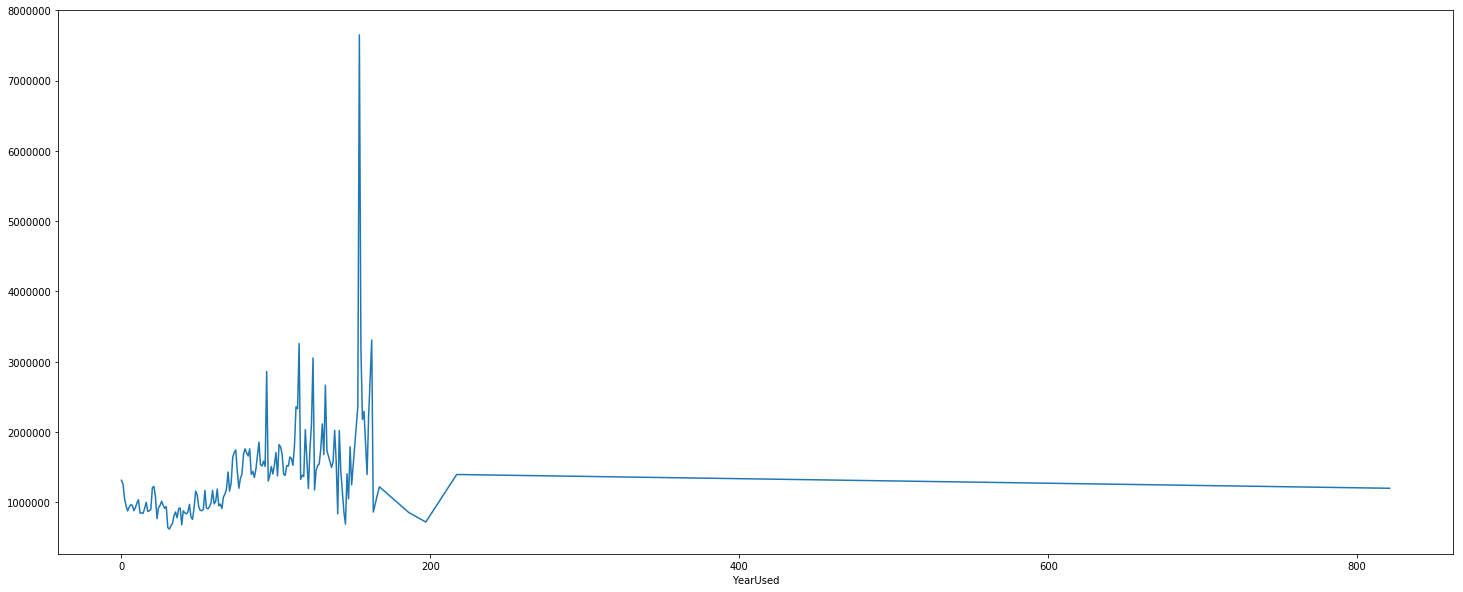

In [44]:
price_by_year.plot(figsize = (25,10))

In [186]:
# thêm biến 'Heritage' như mô tả ở trên
data_2['Heritage'] = np.where(data_2.YearUsed>60,1,0)
data_3['Heritage'] = np.where(data_3.YearUsed>60,1,0)

In [46]:
data_2.groupby('Regionname').Price.describe().sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Regionname,,,,,,,,
Southern Metropolitan,"11,179.00","1,395,928.33","748,648.26","112,000.00","900,000.00","1,395,928.33","1,600,000.00","11,200,000.00"
Eastern Metropolitan,"4,028.00","1,108,723.00","407,591.49","288,000.00","851,000.00","1,108,723.00","1,250,000.00","5,000,000.00"
South-Eastern Metropolitan,"1,552.00","877,682.68","362,979.00","266,000.00","675,000.00","871,500.00","978,500.00","9,000,000.00"
Northern Metropolitan,"8,985.00","861,484.05","409,089.05","121,000.00","603,000.00","810,000.00","970,000.00","6,500,000.00"
Western Metropolitan,"6,430.00","837,615.32","363,931.50","85,000.00","600,000.00","790,000.00","950,000.00","4,020,000.00"
Eastern Victoria,196.00,"714,328.20","209,234.65","337,000.00","595,000.00","714,328.20","781,500.00","2,300,000.00"
Northern Victoria,186.00,"618,895.57","212,961.92","296,000.00","473,250.00","588,000.00","699,750.00","1,430,000.00"
Western Victoria,103.00,"435,472.92","120,508.81","280,500.00","375,000.00","415,000.00","453,000.00","1,152,000.00"


In [ ]:
- Giá bán nhà ở khu vực Southern Metropolitan cao nhất, đạt $1.395.928.
- Giá bán nhà có sự phân biệt giữa các khu vực.

=> Giả thuyết thứ 9: giá bán nhà TB có sự khác nhau giữa các khu vực

In [ ]:
Trước khi thực hiện hồi quy ta sử dụng các biến dummy để thể hiện các giá trị khác nhau của 'Type' và 'Regionname'

In [187]:
# one hot encode 'Type' data_2
one_hot = pd.get_dummies(data_2.Type)
data_2 = data_2.join(one_hot)
data_2 = data_2.drop(columns = ['Type', 'u'])

# one hot encode 'Type' data_3
one_hot = pd.get_dummies(data_3.Type)
data_3 = data_3.join(one_hot)
data_3 = data_3.drop(columns = ['Type', 'u'])

# one hot encode 'Regionname' data_2
one_hot = pd.get_dummies(data_2.Regionname)
data_2 = data_2.join(one_hot)
data_2 = data_2.drop(columns = ['Regionname', 'Western Victoria'])

# one hot encode 'Regionname' data_3
one_hot = pd.get_dummies(data_3.Regionname)
data_3 = data_3.join(one_hot)
data_3 = data_3.drop(columns = ['Regionname', 'Western Victoria'])

In [188]:
# drop các columns không sử dụng trong phân tích
data_2_archived = data_2
data_2 = data_2.drop(columns = ['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'YearBuilt', 'CouncilArea'])

In [189]:
# drop các columns không sử dụng trong phân tích
data_3_archived = data_3
data_3 = data_3.drop(columns = ['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'YearBuilt', 'CouncilArea'])

In [31]:
# tách tập x và y để hồi quy
x_model2 = data_2.drop(columns=['Price'])
y_model2 = (data_2.Price)/1000

x_model3 = data_3.drop(columns=['Price'])
y_model3 = (data_3.Price)/1000

In [32]:
# hồi quy OLS cho data_2
lin_reg = LinearRegression()
x_model2_train, x_model2_test, y_model2_train, y_model2_test = train_test_split(x_model2, y_model2, test_size = 0.2, random_state = 0)
lin_reg.fit(x_model2_train, y_model2_train)

# make predict on test sample
y_model2_pred = lin_reg.predict(x_model2_test)
residuals_model2 = y_model2_pred - y_model2_test

# print summary using statsmodels module
x_model2_train_2 = sm.add_constant(x_model2_train)
est = sm.OLS(y_model2_train, x_model2_train_2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     1706.
Date:                Mon, 15 Oct 2018   Prob (F-statistic):               0.00
Time:                        21:29:23   Log-Likelihood:            -1.9457e+05
No. Observations:               26127   AIC:                         3.892e+05
Df Residuals:                   26110   BIC:                         3.893e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [33]:
# R2 của hồi quy OLS data_2
lin_reg.score(x_model2_test, y_model2_test)

-0.49358403056701605

In [ ]:
- R2 bị âm cho thấy mô hình hồi quy fit không tốt so với tập test, tuy nhiên cũng có thể là do trong tập test có một quan sát
outlier nào đó quá lớn. Ta cần vẽ đồ thị scatter của phần dư hồi quy để xem xét.

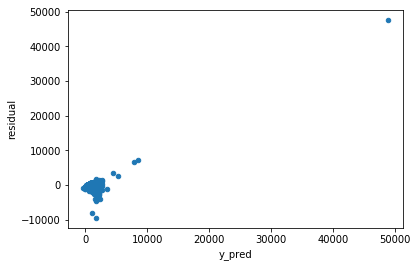

In [34]:
residual_ytest_model2 = pd.DataFrame({'residual':residuals_model2,'y_pred':y_model2_pred})
residual_ytest_model2.plot(kind = 'scatter', x = 'y_pred', y = 'residual')

In [ ]:
Ta thấy có một quan sát với phần dư hồi quy rất lớn. Đây là phần dư hồi quy có index=21472. Ta tạm thời loại quan sát này ra để
xem khả năng fit của mô hình trên tập test.

0.4447066199322356

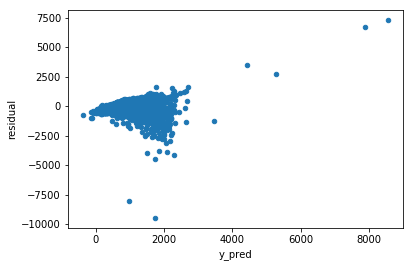

In [35]:
residual_ytest_model2 = residual_ytest_model2[~(residual_ytest_model2.residual == residuals_model2.max())]
residual_ytest_model2.plot(kind = 'scatter', x = 'y_pred', y = 'residual')
lin_reg.score(x_model2_test.drop(21472, axis=0), y_model2_test.drop(21472,axis=0))

In [ ]:
Như vậy sau khi loại quan sát outlier ra mô hình fit tương đối tốt trên tập test với R2 = 0,44. Ta sẽ loại quan sát outlier này
khỏi dữ liệu trước khi thực hiện các phương pháp khác.

Từ đồ thị scatter của residual ta có thể thấy phần dư của hồi quy có phương sai không đồng nhất. Đối với nhà ở có giá thấp thì
phần dư tương đối nhỏ những nhà ở có giá trị càng cao phần dư càng lớn và có độ phân tán hơn.

In [ ]:
Tương tự như vậy, ta chạy hồi quy OLS cho tập data_3:

In [36]:
# hồi quy OLS cho data_3
lin_reg_2 = LinearRegression()
x_model3_train, x_model3_test, y_model3_train, y_model3_test = train_test_split(x_model3, y_model3, test_size = 0.2, random_state = 0)
lin_reg_2.fit(x_model3_train, y_model3_train)

# make predict on test sample
y_model3_pred = lin_reg_2.predict(x_model3_test)
residuals_model3 = y_model3_pred - y_model3_test

# print summary
x_model3_train_2 = sm.add_constant(x_model3_train)
est = sm.OLS(y_model3_train, x_model3_train_2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     596.2
Date:                Mon, 15 Oct 2018   Prob (F-statistic):               0.00
Time:                        21:30:17   Log-Likelihood:                -64699.
No. Observations:                8673   AIC:                         1.294e+05
Df Residuals:                    8654   BIC:                         1.296e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [37]:
# R2 của hồi quy OLS trên data_3
lin_reg_2.score(x_model3_test, y_model3_test)

0.5581021754196381

In [38]:
# drop quan sát với index = 21472 như phân tích ở trên trước khi thực hiện cross validation
x_model2 = x_model2.drop(index = 21472)
y_model2 = y_model2.drop(index = 21472)

In [39]:
# apply OLS model with cross validation (data_2)
sum_R2 = 0
count_R2 = 0
for test in range(10):
    lin_reg = LinearRegression()
    x_model2_train, x_model2_test, y_model2_train, y_model2_test = train_test_split(x_model2, y_model2, test_size = 0.2)
    lin_reg.fit(x_model2_train, y_model2_train)
    sum_R2 += lin_reg.score(x_model2_test, y_model2_test)
    count_R2 += 1
    print('# R2 score of %d test: %.2f' %(test, lin_reg.score(x_model2_test, y_model2_test)))
print('# Average R2 score: %.2f' %(sum_R2/count_R2))

# R2 score of 0 test: 0.50
# R2 score of 1 test: 0.50
# R2 score of 2 test: 0.45
# R2 score of 3 test: 0.49
# R2 score of 4 test: 0.50
# R2 score of 5 test: 0.49
# R2 score of 6 test: 0.51
# R2 score of 7 test: 0.51
# R2 score of 8 test: 0.49
# R2 score of 9 test: 0.52
# Average R2 score: 0.50


In [ ]:
Khả năng fit trung bình của mô hình OLS đối với data_2 đạt 0,5 và R2 score của các lần sampling tương đối gần nhau.

In [40]:
# apply OLS model with cross validation (data_3)
sum_R2 = 0
count_R2 = 0
for test in range(10):
    lin_reg = LinearRegression()
    x_model3_train, x_model3_test, y_model3_train, y_model3_test = train_test_split(x_model3, y_model3, test_size = 0.2)
    lin_reg.fit(x_model3_train, y_model3_train)
    sum_R2 += lin_reg.score(x_model3_test, y_model3_test)
    count_R2 += 1
    print('# R2 score of %d test: %.2f' %(test, lin_reg.score(x_model3_test, y_model3_test)))
print('# Average R2 score: %.2f' %(sum_R2/count_R2))

# R2 score of 0 test: 0.54
# R2 score of 1 test: 0.58
# R2 score of 2 test: 0.58
# R2 score of 3 test: 0.52
# R2 score of 4 test: 0.56
# R2 score of 5 test: 0.53
# R2 score of 6 test: 0.57
# R2 score of 7 test: 0.55
# R2 score of 8 test: 0.57
# R2 score of 9 test: 0.57
# Average R2 score: 0.56


In [ ]:
Khả năng fit trung bình của mô hình OLS đối với data_3 đạt 0,56.

In [ ]:
Kết luận câu 2: Mô hình hồi quy OLS có ý nghĩa thống kê khi giá trị p-value của các biến trong mô hình đều rất bé và p-value của
F-test cũng xấp xỉ 0. Tuy nhiên khả năng giải thích của mô hình còn kém với R2 score đạt khoảng 0,5 - 0,55 nghĩa là mô hình chỉ
giải thích được gần một nửa biến động của giá bán nhà. Hơn nữa đồ thị phần dư cho thấy phần dư hồi quy có hiện tượng phương sai
không đồng nhất (homoscedasticity). Tương quan giữa các biến độc lập cũng cho thấy có dấu hiệu của hiện tượng đa cộng tuyến.

Việc khả năng giải thích của mô hình còn hạn chế có thể do chúng ta đã loại biến sau ra khỏi mô hình:
    - 'SellerG': nhà môi giới giỏi có thể bán được nhà với giá tốt hơn

C:\Users\PC\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


0     17.14
1     32.08
2     41.35
3     49.61
4     57.21
5     64.30
6     70.92
7     77.22
8     83.19
9     87.90
10    92.00
11    95.22
12    97.44
13    98.93
14    99.98
15   100.00
dtype: float64

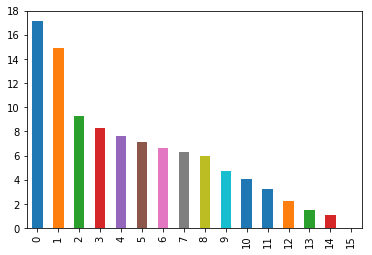

In [41]:
#Xác định số chiều reduce cho PCA (data_2)
pca = PCA()
x_model2_reduced = pca.fit_transform(scale(x_model2))
pca_var_explain = pd.Series(np.round(pca.explained_variance_ratio_*100,decimals=2))
pca_var_explain.plot(kind = 'bar')
pca_var_explain.cumsum()

In [ ]:
Từ kết quả cho thấy ta chọn k = 10 sẽ giữ lại được 92% thông tin

C:\Users\PC\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


0    21.05
1    34.74
2    44.28
3    51.88
4    59.07
5    65.25
6    71.41
7    77.04
8    81.89
9    86.61
10   90.64
11   93.31
12   95.60
13   97.42
14   98.85
15   99.76
16   99.96
17   99.99
dtype: float64

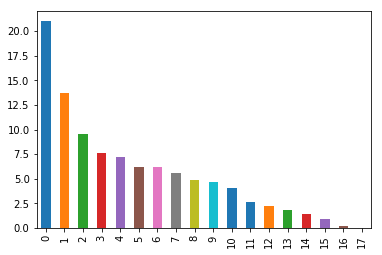

In [42]:
#Xác định số chiều reduce cho PCA (data_3)
pca_data3 = PCA()
x_model3_reduced = pca_data3.fit_transform(scale(x_model3))
pca_var_explain_data3 = pd.Series(np.round(pca_data3.explained_variance_ratio_*100,decimals=2))
pca_var_explain_data3.plot(kind = 'bar')
pca_var_explain_data3.cumsum()

In [ ]:
Từ kết quả cho thấy ta chọn k = 10 sẽ giữ lại được 90,64% thông tin

In [43]:
# PCA regression (data_2)
sum_R2 = 0
count_R2 = 0
x_model2_reduced = PCA(n_components = 10).fit_transform(scale(x_model2))
for test in range(10):
    lin_reg = LinearRegression()
    x_model2_train, x_model2_test, y_model2_train, y_model2_test = train_test_split(x_model2_reduced, y_model2, test_size = 0.2)
    lin_reg.fit(x_model2_train, y_model2_train)
    sum_R2 += lin_reg.score(x_model2_test, y_model2_test)
    count_R2 += 1
    print('# R2 score of %d test: %.2f' %(test, lin_reg.score(x_model2_test, y_model2_test)))
print('# Average R2 score: %.2f' %(sum_R2/count_R2))

C:\Users\PC\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


# R2 score of 0 test: 0.42
# R2 score of 1 test: 0.39
# R2 score of 2 test: 0.40
# R2 score of 3 test: 0.42
# R2 score of 4 test: 0.46
# R2 score of 5 test: 0.44
# R2 score of 6 test: 0.43
# R2 score of 7 test: 0.47
# R2 score of 8 test: 0.43
# R2 score of 9 test: 0.39
# Average R2 score: 0.43


In [44]:
# PCA regression (data_3)
sum_R2 = 0
count_R2 = 0
x_model3_reduced = PCA(n_components = 10).fit_transform(scale(x_model3))
for test in range(10):
    lin_reg = LinearRegression()
    x_model3_train, x_model3_test, y_model3_train, y_model3_test = train_test_split(x_model3_reduced, y_model3, test_size = 0.2)
    lin_reg.fit(x_model3_train, y_model3_train)
    sum_R2 += lin_reg.score(x_model3_test, y_model3_test)
    count_R2 += 1
    print('# R2 score of %d test: %.2f' %(test, lin_reg.score(x_model3_test, y_model3_test)))
print('# Average R2 score: %.2f' %(sum_R2/count_R2))

# R2 score of 0 test: 0.51
# R2 score of 1 test: 0.52
# R2 score of 2 test: 0.51
# R2 score of 3 test: 0.47
# R2 score of 4 test: 0.50
# R2 score of 5 test: 0.47
# R2 score of 6 test: 0.52
# R2 score of 7 test: 0.51
# R2 score of 8 test: 0.54
# R2 score of 9 test: 0.53
# Average R2 score: 0.51


C:\Users\PC\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


In [ ]:
Kết luận câu 3: Kết quả hồi quy sau khi thực hiện giảm chiều PCA không có nhiều cải thiện so với thực hiện hồi quy trên dữ liệu
gốc.

In [ ]:
Ta thử đưa thêm biến 'SellerG' vào mô hình hồi quy bằng một biến ordinal là 'SellerG_idx' nhận giá trị 1,2,3,4 khi giá bán TB của
nhà môi giới đó lần lượt thuộc các khoản [min,Q1), [Q1,Q2), [Q1,Q3) và [Q1,max]

In [153]:
data_2_archived.groupby('SellerG').Price.mean().describe()

count         377.00
mean      982,790.78
std       404,195.22
min       325,000.00
25%       714,328.20
50%       891,497.34
75%     1,142,964.17
max     3,780,000.00
Name: Price, dtype: float64

In [191]:
min_ = data_2_archived.groupby('SellerG').Price.mean().min()
Q1 = data_2_archived.groupby('SellerG').Price.mean().quantile(0.25)
Q2 = data_2_archived.groupby('SellerG').Price.mean().quantile(0.5)
Q3 = data_2_archived.groupby('SellerG').Price.mean().quantile(0.75)
max_ = data_2_archived.groupby('SellerG').Price.mean().max()
price_by_seller = data_2_archived.groupby('SellerG').Price.mean()
price_by_seller_threshold = pd.cut(price_by_seller, bins = [min_, Q1, Q2, Q3, max_], labels = [1,2,3,4])
price_by_seller_threshold = pd.DataFrame({'SellerG_idx':price_by_seller_threshold})
price_by_seller_threshold.astype('float32')
data_2_archived = data_2_archived.merge(price_by_seller_threshold,how = 'left',right_index = True,left_on = ['SellerG'])

In [192]:
data_2_archived = data_2_archived.drop(columns = ['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'YearBuilt', 'CouncilArea'])
data_2_archived = data_2_archived.dropna()

In [193]:
x_model4 = data_2_archived.drop(columns=['Price'])
y_model4 = (data_2_archived.Price)/1000

In [194]:
data_2_archived.isnull().sum()

Rooms                         0
Price                         0
Distance                      0
Car                           0
Landsize                      0
BuildingArea                  0
YearUsed                      0
Heritage                      0
h                             0
t                             0
Eastern Metropolitan          0
Eastern Victoria              0
Northern Metropolitan         0
Northern Victoria             0
South-Eastern Metropolitan    0
Southern Metropolitan         0
Western Metropolitan          0
SellerG_idx                   0
dtype: int64

In [195]:
# hồi quy OLS cho data_2_archived
lin_reg = LinearRegression()
x_model4_train, x_model4_test, y_model4_train, y_model4_test = train_test_split(x_model4, y_model4, test_size = 0.2, random_state = 0)
lin_reg.fit(x_model4_train, y_model4_train)

# make predict on test sample
y_model4_pred = lin_reg.predict(x_model4_test)
residuals_model4 = y_model4_pred - y_model4_test

# print summary using statsmodels module
x_model4_train_2 = sm.add_constant(x_model4_train)
est = sm.OLS(y_model4_train, x_model4_train_2)
est2 = est.fit()
print(est2.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [196]:
x_model4_train_2.dtypes

const                          float64
Rooms                            int64
Distance                       float64
Car                            float64
Landsize                       float64
BuildingArea                   float64
YearUsed                       float64
Heritage                         int32
h                                uint8
t                                uint8
Eastern Metropolitan             uint8
Eastern Victoria                 uint8
Northern Metropolitan            uint8
Northern Victoria                uint8
South-Eastern Metropolitan       uint8
Southern Metropolitan            uint8
Western Metropolitan             uint8
SellerG_idx                   category
dtype: object